# General Info

dataset: LFW-People (https://www.kaggle.com/atulanandjha/lfwpeople/data)

In [12]:
import os

In [13]:
import pandas as pd

In [23]:
_, dirs,_ = next(os.walk("./dataset"))

In [24]:
folders = pd.DataFrame(dirs)

In [25]:
folders.columns = ["name"]

In [26]:
folders.head()

,name
0,Martin_Boryczewski
1,Bobby_Jackson
2,Sven_Ottke
3,Alan_Zemaitis
4,Ashraf_Alasmar


## Picture Urls

In [28]:
folders["file"] = folders["name"].apply(lambda x: os.listdir("./dataset/"+x))

In [29]:
folders.head()

,name,file
0,Martin_Boryczewski,[Martin_Boryczewski_0001.jpg]
1,Bobby_Jackson,[Bobby_Jackson_0001.jpg]
2,Sven_Ottke,[Sven_Ottke_0001.jpg]
3,Alan_Zemaitis,[Alan_Zemaitis_0001.jpg]
4,Ashraf_Alasmar,[Ashraf_Alasmar_0001.jpg]


In [33]:
pictures = pd.DataFrame(folders.file.tolist(), index=folders.name).stack().reset_index(level=1, drop=True).reset_index(name='file')[['file','name']]
pictures["file"] = pictures["name"]+"/"+pictures["file"]

In [34]:
pictures.head()

,file,name
0,Martin_Boryczewski/Martin_Boryczewski_0001.jpg,Martin_Boryczewski
1,Bobby_Jackson/Bobby_Jackson_0001.jpg,Bobby_Jackson
2,Sven_Ottke/Sven_Ottke_0001.jpg,Sven_Ottke
3,Alan_Zemaitis/Alan_Zemaitis_0001.jpg,Alan_Zemaitis
4,Ashraf_Alasmar/Ashraf_Alasmar_0001.jpg,Ashraf_Alasmar


## Feature Extraction

In [36]:
import keras_vggface

Using TensorFlow backend.


In [59]:
from mtcnn import MTCNN

In [44]:
import matplotlib.pyplot as plt

In [62]:
from IPython.display import Image

In [69]:
import cv2

In [70]:
testfile = 'dataset/Jennifer_Lopez/Jennifer_Lopez_0009.jpg'

In [81]:
def extract_face(filename, required_size=(224, 224)):

    pixels = cv2.imread(filename)
    pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(pixels_rgb)
    
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels_rgb[y1:y2, x1:x2]
    
    face_rsz = cv2.resize(face, required_size)
    
    return face_rsz

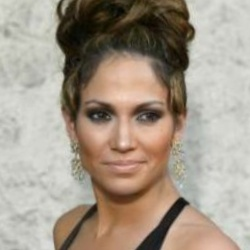

In [82]:
Image(testfile)

In [83]:
face =  extract_face(testfile)

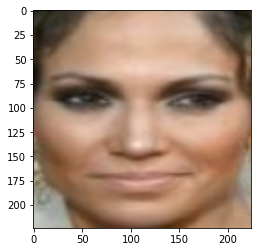

In [84]:
plt.imshow(face)
plt.show()